In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

#chapter3-1 문제 해결을 위해 당뇨병 환자의 데이터 준비하기
 당뇨병환자의 1년후 병의 진전된 정도를 예측

In [0]:
from sklearn.datasets import load_diabetes
# Bunch클래스로 데이터가 들어있는데 파이썬의 딕셔너리와 비슷하며 특별한 기능은 없다..
diabetes = load_diabetes()          

In [0]:
# data는 입력, target은 타깃 데이터
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


* 행은 샘플(당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트), 열은 특성(당뇨병 데이터의 여러 특징들 --> 혈압 몸무게 키 등등)
* 입력 데이터의 수치를 자세히 아는것보다는 입력과 타겟사이에 규칙(모델)을 찾으면 된다.
* 입력 데이터가 의미하는것이 매우 중요할 수 있으므로 이는 해당분야 전문사의 도움을 받는다.

In [0]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [0]:
diabetes.target[:3]

array([151.,  75., 141.])

# matplotlib scatter함수로 산점도 그리기

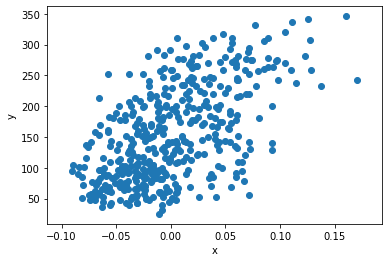

In [0]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
# 입력 데이터의 세번째 특성을 미리 분리
x = diabetes.data[:,2]
y = diabetes.target

# chapter3-2 경사 하강법으로 학습하는 방법
* 여러가지 특성을 사용하면 높은 차원에서의 초평면을 그려야 한다
* 여러가지 초평면을 생각하는 것은 힘들며 따라서 특성을 1개 또는 2개를 사용하여 2차원 
* 또는 3차원의 그래프를 다룬다.
* 낮은 차원에서 얻은 직관은 높은 차원으로 확장이 가능한 경우가 있다.
* 선형 회귀의 목표는 x,y값이 주어지면 기울기와 절편을 구하는 것이다.
* 즉, 산점도 그래프를 잘 표현하는 직선의 방정식을 찾는 것이다.
* 경사하강법(gradient descent) : 모델이 데이터를 잘 표현할 수 있도록 기울기(변화량)을 사용하여
* 모델을 조금씩 조정하는 최적화 알고리즘
* ŷ = ωx + b --> a는 가중치를 의미하는 ω또는 계수를 의미하는 θ로 나타내며 y는 ŷ으로 나타낸다
* 가중치와 절편(ω, b)는 알고리즘이 찾은 규칙을 의미하며, ŷ은 예측값을 의미한다.



# 훈련데이터에 맞는 w와 b찾기
 1. 무작위로 w와 b를 정한다 (무작위로 모델 찾기)
 2. x에거 샘플을 하나꺼내 ŷ을 계산한다
 3. ŷ과 실제 y값을 비교한다
 4. ŷ이 y와 가까워지도록 w와 b를 조정한다
 5. 모든 샘플을 처리할 때까지 2~4반복한다

In [0]:
w = 1.0
b = 1.0

y_hat = x[0]*w+b
print(y_hat)
print(y[0])

1.0616962065186886
151.0


In [0]:
w_inc = w+0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


 ω를 0.1 증가시켰을때 훈련데이터 x[0]에대한 w의 변화율을 구한다.
 변화율은 x[0]와 동일하게 나온다.

In [0]:
w_rate = (y_hat_inc - y_hat)/(w_inc-w)
print(w_rate)

0.061696206518688734


# 변화율이 양수일때 가중치 업데이트 하는 방법
*  변화율이 0보다 큰 경우 y_hat이 증가하려면 w가 증가해야한다.
*  즉, 변화율이 양수인 점을 이용하여 변화율을 w에 더하는 방법으로 w를 증가시킬 수 있다.


# 변화율이 음수일떄 가중치 업데이트 하는 방법
*  w가 감소하면 h_hat은 증가한다
*  즉, 변화율이 음수인 점을 이용하여 변화율을 더하는 방법으로 y_hat을 증가시킬 수 있다.
* 두 방법의 문제점은 y_hat이 y에 비해 너무 작은 값이면 큰 폭으로 w와 b를 증가시킬 수 없으며,
* y_hat이 y보다 커지면 y_hat을 감소시키지 못한다

In [0]:
w_new = w+w_rate
print(w_new)

1.0616962065186888


In [0]:
b_inc = b+0.1
y_hat_inc = x[0]*w+b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat)/(b_inc-b)
print(b_rate)

1.1616962065186887
1.0


In [0]:
b_new = b+1
print(b_new)

2.0


# 오차 역전파로 가중치와 절편 업데이트
* y에서 y_hat을 뺀 오차의 양을 곱하는 방법으로 w를 업데이트 한다면, y_hat이 y보다 많이 작을 경우
* 변화량의 크기를 크게 할 수 있고 y_hat이 y를 지나칠 경우 w와 b의 방향도 바꿀 수 있다.

# 오차와 변화율을 곱해서 가중치 업데이트 하기

In [0]:
err=y[0]-y_hat
w_new = w+w_rate*err
b_new = b+1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


* 두 번째 샘플을 사용하여 오차를 구하고 새로운 w와 b를 구한다.
* w_rate는 x[1]이 된다.

In [0]:
y_hat = x[1]*w_new + b_new
err = y[1]-y_hat
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+1*err

In [0]:
print(w_new, b_new)

14.132317616381767 75.52764127612664


# 전체 샘플 업데이트 하기
* zip()은 여러개의 배열에서 동시에 원소를 하니씩 꺼내준다.

In [0]:
for x_i, y_i in zip(x,y):
  y_hat = x_i*w+b
  err=y_i-y_hat
  w_rate=x_i
  w=w+w_rate*err
  b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


* plt에서 직선을 그리려면 시작점과 종료점의 x,y좌표를 plot()함수에 전달하면 된다.

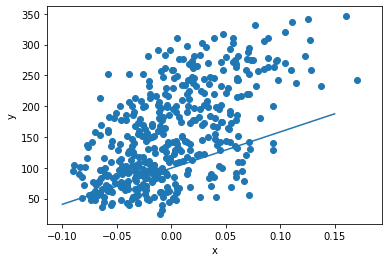

In [0]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* 여러 에포크를 반복하며 직선의 위치를 잡는다.

In [0]:
for i in range(1,100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


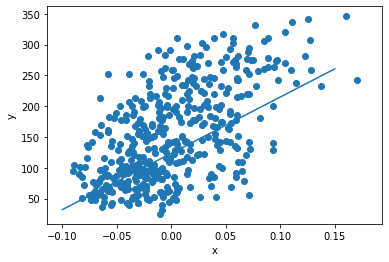

In [0]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* 모델의 예측은 주어진 x값을 모델에 입력해보고 나오는 값을 확인한다

In [0]:
x_new = 0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


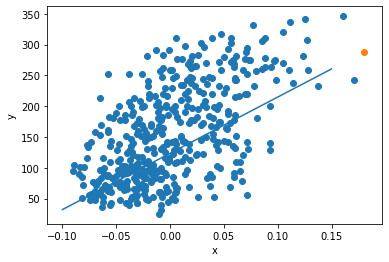

In [0]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 경사하강법
* 어떤 손실함수(loss function)이 정의되있을때 손실함수의 값이 최소가 되는 지점을 찾는 방법

# 손실함수
* 예상한 값과 실제 타깃값의 차이를 함수로 정의한 것을 말한다
* 이전에 사용한 오차를 변화율에 곱하여 가중치와 절편을 업데이트 하는것은 '제곱 오차'라는 손실함수를 미분한 것이다.

# 제곱 오차(squared error)
* 타깃과 예측값을 뺀 다음 제곱한 것
* 제곱 오차가 최소가 되면 산점도 그래프를 가장 잘 표현한 직선이 그려진다
* 제곱 오차 함수의 최솟값을 알아내려면, 기울기에 따라 함수의 값이 낮은 쪽으로 이동해야 한다.
* 기울기를 구하려면 제곱 오차를 가중치나 절편에 대해 미분해야 한다.

* w에서 변화율을 더하지 않고 빼는 이유는 손실 함수의 낮은 쪽으로 이동하고 싶기 때문이다.
* 오차 역전파에서 적용하였던 수식(w + w_rate*err)은 제곱 오차를 미분한 것과 같다.


In [0]:
y_hat = x_i*w+b
err=y_i-y_hat
w_rate=x_i
w=w+w_rate*err

In [0]:
# 절편에 대하여 제곱 오차 미분또한 식은 위와 비슷하다
err=y_i-y_hat
b=b+1*err

* 손실 함수에 대해 일일이 변화율을 계산하는 것이 아니라 편미분을 사용하여 변화율을 계산한다.
* 변화율은 인공지능 분야에서 그레디언트(gradient)라고 부른다.

In [0]:
class Neuron:
  def __init__(self):
  # 초기 작업 실행
    self.w=1.0
    self.b=1.0

  # 필요한 메서드 추가
  def forpass(self, x):
    y_hat = x*self.w + self.b
    return y_hat

  def backpass(self, x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err=-(y_i - y_hat)
        w_grad, b_grad = self.backpass(x_i,err)
        self.w-=w_grad
        self.b-=b_grad


In [0]:
neuron=Neuron()
neuron.fit(x,y)

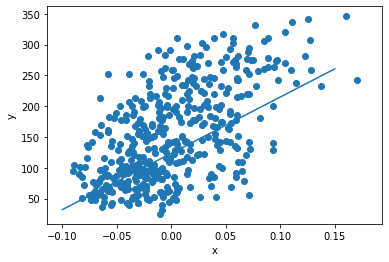

In [0]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*neuron.w + neuron.b)
pt2=(0.15,0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()